In [1]:
import numpy as np 
import pyvista
import meshio
from pyvista import examples
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.size'] = 17    # size to use for Matplotlib figures.
plt.style.use('dark_background')  # Set the dark background style

In [3]:
mesh16_200_AWS = pyvista.read('openFoamAWS/case16/VTK/case16_200.vtk')
mesh16_400_AWS = pyvista.read('openFoamAWS/case16/VTK/case16_400.vtk')
mesh16_1000_AWS = pyvista.read('openFoamAWS/case16/VTK/case16_1000.vtk')
mesh16_1400_AWS = pyvista.read('openFoamAWS/case16/VTK/case16_1400.vtk')
aws_16 = np.array([mesh16_200_AWS,mesh16_400_AWS,mesh16_1000_AWS,mesh16_1400_AWS])
aws_16n = ['mesh16_200_AWS','mesh16_400_AWS','mesh16_1000_AWS','mesh16_1400_AWS']

mesh16_200_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_200.vtk')
mesh16_400_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_400.vtk')
mesh16_600_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_600.vtk')
mesh16_800_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_800.vtk')
mesh16_1000_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_1000.vtk')
mesh16_1200_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_1200.vtk')
mesh16_1400_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_1400.vtk')
mesh16_1600_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_1600.vtk')
mesh16_1800_MAC = pyvista.read('openFoamMAC/case16/VTK/case16_1800.vtk')
mac_16 = np.array([mesh16_200_MAC ,mesh16_400_MAC ,mesh16_600_MAC ,
                   mesh16_800_MAC ,mesh16_1000_MAC,mesh16_1200_MAC,
                   mesh16_1400_MAC,mesh16_1600_MAC,mesh16_1800_MAC])
mac_16n = ['mesh16_200_MAC' ,'mesh16_400_MAC' ,'mesh16_600_MAC' ,
                   'mesh16_800_MAC' ,'mesh16_1000_MAC','mesh16_1200_MAC',
                   'mesh16_1400_MAC','mesh16_1600_MAC','mesh16_1800_MAC']

mesh32_200_AWS = pyvista.read('openFoamAWS/case32/VTK/case32_200.vtk')
mesh32_400_AWS = pyvista.read('openFoamAWS/case32/VTK/case32_400.vtk')
mesh32_1000_AWS = pyvista.read('openFoamAWS/case32/VTK/case32_1000.vtk')
mesh32_1400_AWS = pyvista.read('openFoamAWS/case32/VTK/case32_1400.vtk')
mesh32_2000_AWS = pyvista.read('openFoamAWS/case32/VTK/case32_2000.vtk')
aws_32 = np.array([mesh32_200_AWS ,mesh32_400_AWS ,mesh32_1000_AWS,
                   mesh32_1400_AWS,mesh32_2000_AWS])
aws_32n = ['mesh32_200_AWS' ,'mesh32_400_AWS' ,'mesh32_1000_AWS',
                   'mesh32_1400_AWS','mesh32_2000_AWS']

mesh32_200_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_200.vtk')
mesh32_400_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_400.vtk')
mesh32_600_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_600.vtk')
mesh32_800_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_800.vtk')
mesh32_1000_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_1000.vtk')
mesh32_1200_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_1200.vtk')
mesh32_1400_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_1400.vtk')
mesh32_1600_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_1600.vtk')
mesh32_1800_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_1800.vtk')
mesh32_2000_MAC = pyvista.read('openFoamMAC/case32/VTK/case32_2000.vtk')
mac_32 = np.array([mesh32_200_MAC ,mesh32_400_MAC ,mesh32_600_MAC ,
                   mesh32_800_MAC ,mesh32_1000_MAC,mesh32_1200_MAC,
                   mesh32_1400_MAC,mesh32_1600_MAC,mesh32_1800_MAC,
                   mesh32_2000_MAC])
mac_32n = ['mesh32_200_MAC' ,'mesh32_400_MAC','mesh32_600_MAC ',
           'mesh32_800_MAC' ,'mesh32_1000_MAC','mesh32_1200_MAC',
           'mesh32_1400_MAC','mesh32_1600_MAC','mesh32_1800_MAC',
           'mesh32_2000_MAC']

In [5]:
def maxmean(mesh):
    maxv  = mesh.point_arrays['U'].max()
    meanv = mesh.point_arrays['U'].mean()
    return maxv, meanv

aws_16_max, aws_16_mean, i = np.zeros_like(aws_16n),np.zeros_like(aws_16n) , 0 
while i < len(aws_16):
    aws_16_max[i], aws_16_mean[i] = maxmean(aws_16[i])
    i+=1

mac_16_max, mac_16_mean, i = np.zeros_like(mac_16n),np.zeros_like(mac_16n) , 0 
while i < len(mac_16):
    mac_16_max[i], mac_16_mean[i] = maxmean(mac_16[i])
    i+=1

aws_32_max, aws_32_mean, i = np.zeros_like(aws_32n),np.zeros_like(aws_32n) , 0 
while i < len(aws_32):
    aws_32_max[i], aws_32_mean[i] = maxmean(aws_32[i])
    i+=1

mac_32_max, mac_32_mean, i = np.zeros_like(mac_32n),np.zeros_like(mac_32n) , 0 
while i <= len(mac_16):
    mac_32_max[i], mac_32_mean[i] = maxmean(mac_32[i])
    i+=1

In [6]:
df_mac_16 = pd.DataFrame({'label': mac_16n, 'Max': mac_16_max, 'Mean':mac_16_mean})
df_aws_16 = pd.DataFrame({'label': aws_16n, 'Max': aws_16_max, 'Mean':aws_16_mean})
df_mac_32 = pd.DataFrame({'label': mac_32n, 'Max': mac_32_max, 'Mean':mac_32_mean})
df_aws_32 = pd.DataFrame({'label': aws_32n, 'Max': aws_32_max, 'Mean':aws_32_mean})

In [7]:
mac_16_maxall  = np.array([float(df_mac_16['Max'][0]),float(df_mac_16['Max'][2]),float(df_mac_16['Max'][3]),float(df_mac_16['Max'][5]),float(df_mac_16['Max'][7]),float(df_mac_16['Max'][8])])
mac_32_maxall  = np.array([float(df_mac_32['Max'][0]),float(df_mac_32['Max'][2]),float(df_mac_32['Max'][5]),float(df_mac_32['Max'][7]),float(df_mac_32['Max'][8])])
aws_32_maxall = np.array([float(df_aws_32['Max'][0]),float(df_aws_32['Max'][1]),float(df_aws_32['Max'][2]),float(df_aws_32['Max'][3]),float(df_aws_32['Max'][4])])
aws_16_maxall = np.array([float(df_aws_16['Max'][0]),float(df_aws_16['Max'][1]),float(df_aws_16['Max'][2]),float(df_aws_16['Max'][3]),1])
realtime  = [0.0,0.2,0.5,0.7,1.0]
realtime1 = [0.1, 0.2, 0.5, 0.7, 1.0]
realtime2 = [0.0, 0.1,0.2, 0.5, 0.7, 1.0]

In [8]:
# Analytic solution
analytic_hp = 1.0432 # m/s
err_mac_16 = np.abs(mac_16_maxall- analytic_hp)
err_mac_32 = np.abs(mac_32_maxall- analytic_hp)
err_aws_32 = np.abs(aws_32_maxall- analytic_hp)
err_aws_16 = np.abs(aws_16_maxall- analytic_hp)

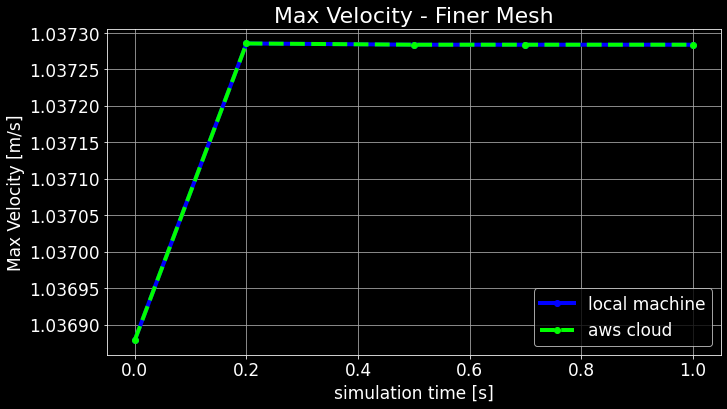

In [31]:
plt.figure(figsize=(11,6))
plt.title('Max Velocity - Finer Mesh',fontsize=22)
plt.ylabel('Max Velocity [m/s]')
plt.xlabel('simulation time [s]')
plt.plot(realtime, mac_32_maxall , '-o', color='blue', linewidth= 4, label='local machine')
plt.plot(realtime, aws_32_maxall , '--o', color='#00FF00', linewidth= 4, label='aws cloud')
# plt.xlim(0,1.1)
plt.legend()
plt.grid(color='darkgray')
plt.savefig('figures/maxvel_simtime_32.png', dpi=300)

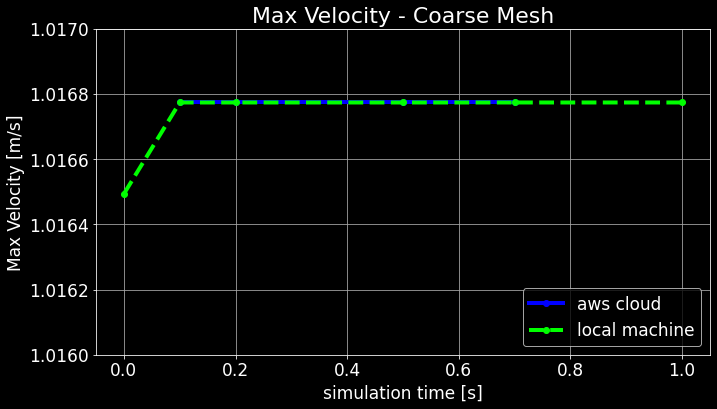

In [34]:
plt.figure(figsize=(11,6))
plt.title('Max Velocity - Coarse Mesh',fontsize=22)
plt.ylabel('Max Velocity [m/s]')
plt.xlabel('simulation time [s]')
plt.plot(realtime1[:-1], aws_16_maxall[:-1] , '-o', color='blue', linewidth= 4, label='aws cloud')
plt.plot(realtime2, mac_16_maxall , '--o', color='#00FF00', linewidth= 4, label='local machine')
plt.ylim(1.016,1.017)
plt.legend(loc='lower right')
plt.grid(color='darkgray')
plt.savefig('figures/maxvel_simtime_16.png', dpi=300)

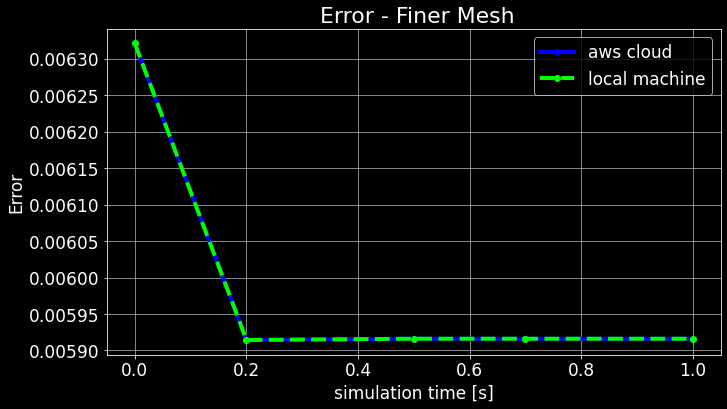

In [11]:
plt.figure(figsize=(11,6))
plt.title(' Error - Finer Mesh',fontsize=22)
plt.ylabel('Error')
plt.xlabel('simulation time [s]')
plt.plot(realtime, err_aws_32 , '-o', color='blue', linewidth= 4, label='aws cloud')
plt.plot(realtime, err_mac_32 , '--o', color='#00FF00', linewidth= 4, label='local machine')
plt.legend(loc='upper right')
plt.grid(color='darkgray')
plt.savefig('figures/error_simtime_32.png', dpi=300)

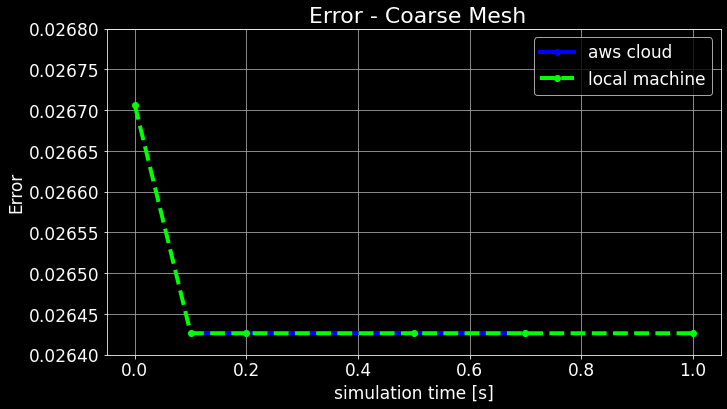

In [12]:
plt.figure(figsize=(11,6))
plt.title(' Error - Coarse Mesh',fontsize=22)
plt.ylabel('Error')
plt.xlabel('simulation time [s]')
plt.plot(realtime1[:-1], err_aws_16[:-1] ,'-o', color='blue', linewidth= 4, label='aws cloud')
plt.plot(realtime2, err_mac_16 , '--o', color='#00FF00', linewidth= 4, label='local machine')
plt.ylim(0.0264,0.0268)
plt.legend(loc='upper right')
plt.grid(color='darkgray')
plt.savefig('figures/error_simtime_16.png', dpi=300)

### Run time analysis

In [35]:
# Read the entire log file run.log
with open('openFoamAWS/case16/run16aws.log', 'r') as f:
    log_contents16aws = f.read() # read the entire file into a string
with open('openFoamMAC/case16/run.log', 'r') as f:
    log_contents16mac = f.read() # read the entire file into a string
with open('openFoamAWS/case32/run32aws.log', 'r') as f:
    log_contents32aws = f.read() # read the entire file into a string
with open('openFoamMAC/case32/run.log', 'r') as f:
    log_contents32mac = f.read() # read the entire file into a string

def totaltimes(log):
    regex = r"Time = ([\d\.]+) s  ClockTime = ([\d\.]+) s"
    matches = re.findall(regex, log)
    time_data = [(float(match[0]), float(match[1])) for match in matches]
    df = pd.DataFrame(time_data, columns=["Execution Time (s)", "ClockTime (s)"])
    etime = df['Execution Time (s)'][len(df['Execution Time (s)'])-1]
    ctime = df['ClockTime (s)'][len(df['ClockTime (s)'])-1]
    return df, etime,ctime
    
timedf16aws, etime16aws,ctime16aws = totaltimes(log_contents16aws) 
timedf16mac, etime16mac,ctime16mac = totaltimes(log_contents16mac)
timedf32aws, etime32aws,ctime32aws = totaltimes(log_contents32aws)  
timedf32mac, etime32mac,ctime32mac = totaltimes(log_contents32mac)

etimeaws = np.array([etime16aws,etime32aws])
etimemac = np.array([etime16mac,etime32mac])
meshelem = [35276,85476] #[16,32] # or [32040,78840]

In [97]:
((etimemac[1]/60)/(etimeaws[1]/60))*100

909.722199324046

In [88]:
etimeaws/60

array([ 3.34366667, 10.10916667])

In [91]:
diff = etimemac - etimeaws
diff/60/60

array([0.39906111, 1.36426944])

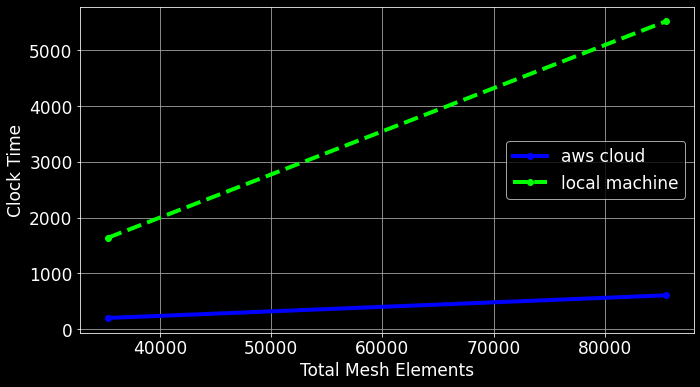

In [36]:
plt.figure(figsize=(11,6))
# plt.title('Compute Time',fontsize=22)
plt.ylabel('Clock Time')
plt.xlabel('Total Mesh Elements')
plt.plot(meshelem, etimeaws,  '-o', color='blue'   ,linewidth= 4, label='aws cloud'    )
plt.plot(meshelem, etimemac, '--o', color='#00FF00',linewidth= 4, label='local machine')
# plt.xticks([32040,78840], ['coarse','fine'])
# plt.xlim(78840,32040) 
# plt.xticks([16,32], ['coarse','fine'])
plt.legend(loc='center right')
plt.grid(color='darkgray')
plt.savefig('figures/clocktime_mesh.png', dpi=300)

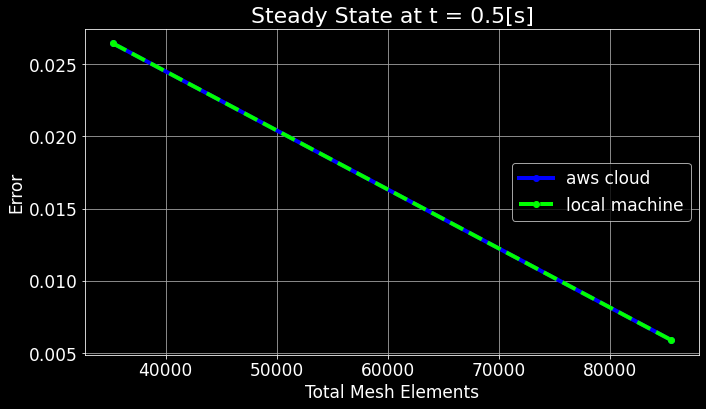

In [37]:
plt.figure(figsize=(11,6))
plt.title('Steady State at t = 0.5[s]',fontsize=22)
plt.ylabel('Error')
plt.xlabel('Total Mesh Elements')
plt.plot(meshelem,(err_aws_16[2],err_aws_32[2]),'-o' , color='blue'   ,linewidth= 4, label='aws cloud'    )
plt.plot(meshelem,(err_mac_16[2],err_mac_32[2]),'--o', color='#00FF00',linewidth= 4, label='local machine')
#plt.xticks([32040,78840], ['coarse','fine'])
# plt.xlim(78840,32040) 
plt.legend(loc='center right')
plt.grid(color='darkgray')
plt.savefig('figures/error_mesh.png', dpi=300)

$Error = V_{analytic} - V_{sim}$